# Séries Temporelles et Pandas

Dans ce notebook nous allons utiliser pandas pour manipuler des séries temporelles de deux crypto-monaies : le bitcoin et l'ethereum.
Le fichier de données du bitcoin commence en 2014 tandis que celui de l'ethereum en 2017.

### Gestion des dates

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bitcoin = pd.read_csv('BTC-EUR.csv')

In [3]:
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
1,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
3,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
4,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


In [4]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True) # La la colonne de date et en index et Python l'interprète bien comme des dates.
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


<AxesSubplot:title={'center':"Cours du bitcoin sur l'année 2019"}, xlabel='Date'>

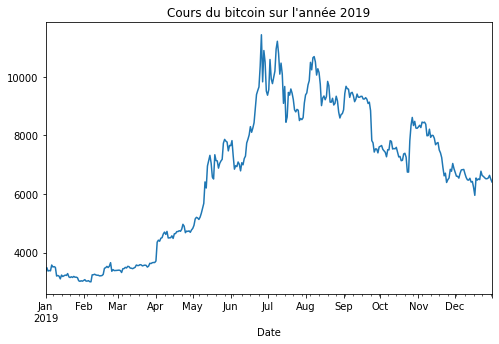

In [5]:
plt.figure(figsize=(8,5))
bitcoin.loc['2019','Close'].plot(title="Cours du bitcoin sur l'année 2019")

On constate sur ce graphique matplotlib que les dates sont bien interprétées.

### Resample

Cette méthode nous permet de regrouper nos données selon une fréquence choisie (année, mois, semaine, minute,...)

Date
2019-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2019-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-11-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: M, Name: Close, dtype: object

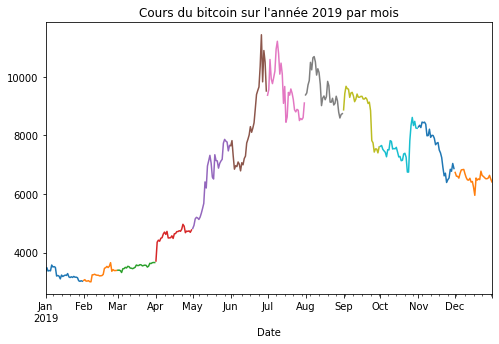

In [6]:
plt.figure(figsize=(8,5))
bitcoin.loc['2019','Close'].resample('M').plot(title="Cours du bitcoin sur l'année 2019 par mois")

On peut aller plus loin en faisant des statistiques sur chacuns de ces groupes créer.

<AxesSubplot:title={'center':'Evolution moyenne par mois du bitcoin en 2019'}, xlabel='Date'>

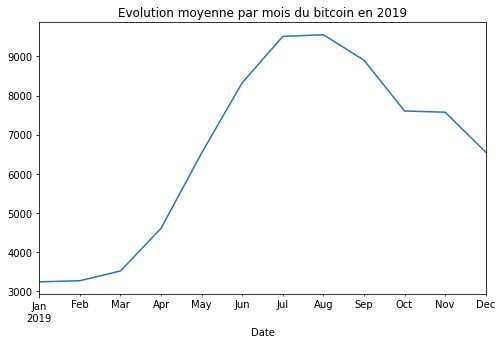

In [7]:
plt.figure(figsize=(8,5))
bitcoin.loc['2019','Close'].resample('M').mean().plot(title="Evolution moyenne par mois du bitcoin en 2019")

La fonction agg est souvent utilisée par dessus un resample car elle permet de demander plusieurs statistiques d'un seul coup.

In [8]:
plt.figure(figsize=(8,5))
bitcoin.loc['2019','Close'].resample('M').agg(['mean','std','min','max'])

,mean,std,min,max
Date,,,,
2019-01-31,3241.492786,154.675614,3015.454102,3572.601807
2019-02-28,3270.404367,183.437120,2998.157227,3653.833008
2019-03-31,3518.958685,84.929107,3317.817383,3659.444824
2019-04-30,4609.844377,222.918594,3710.858154,4964.707031
2019-05-31,6532.714403,1010.175947,4823.619629,7866.871094
2019-06-30,8327.527637,1357.107430,6791.208984,11443.038086
2019-07-31,9511.153604,776.404643,8452.749023,11221.008789
2019-08-31,9552.757151,598.797179,8598.343750,10697.322266
2019-09-30,8902.757308,762.564631,7405.604980,9681.073242


<Figure size 576x360 with 0 Axes>

En stockant ce tableau dans une variable m, on est ensuite en mesure de faire de joli graphiques, notamment avec la propriété fill_between de matplotlib.

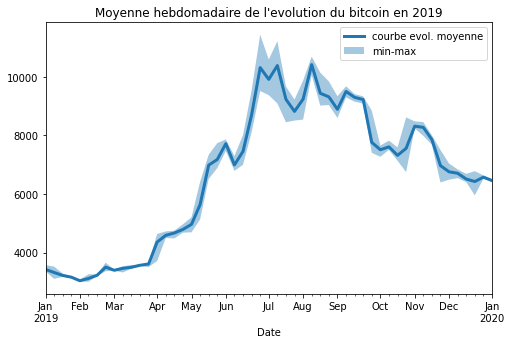

In [9]:
m = bitcoin.loc['2019','Close'].resample('W').agg(['mean','std','min','max'])
plt.figure(figsize=(8,5))
m['mean'].plot(lw=3, label="courbe evol. moyenne")
plt.fill_between(m.index, m['max'], m['min'], alpha=0.4, label="min-max")
plt.title("Moyenne hebdomadaire de l'evolution du bitcoin en 2019")
plt.legend()

### Moving average et moyenne mobile exponentielle (EWM)

Ces méthodes permettent de faire des moyennes 'glissantes' sur la fenêtre que l'on défini.

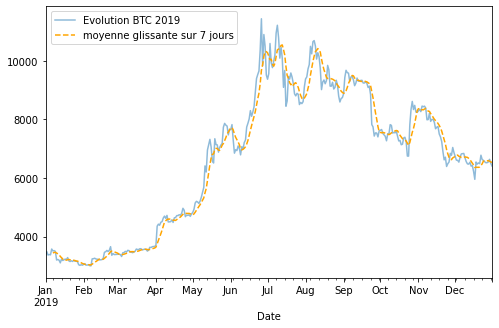

In [10]:
plt.figure(figsize=(8,5))
bitcoin.loc['2019','Close'].plot(alpha=0.5, label='Evolution BTC 2019')
bitcoin.loc['2019','Close'].rolling(window=7).mean().plot(ls="--", c='orange', label='moyenne glissante sur 7 jours')
plt.legend()

On pourrait penser que cette méthode est super mais si on zoom un petit peu, par exemple sur le mois de septembre, on se rend compte que notre courbe semble décalée.
En effet, la valeur de la moyenne calculée est placée au bout de la fenêtre de 7 jours. On peut palier à ça via l'argument center=True.

Text(0.5, 1.0, 'Avec center=True')

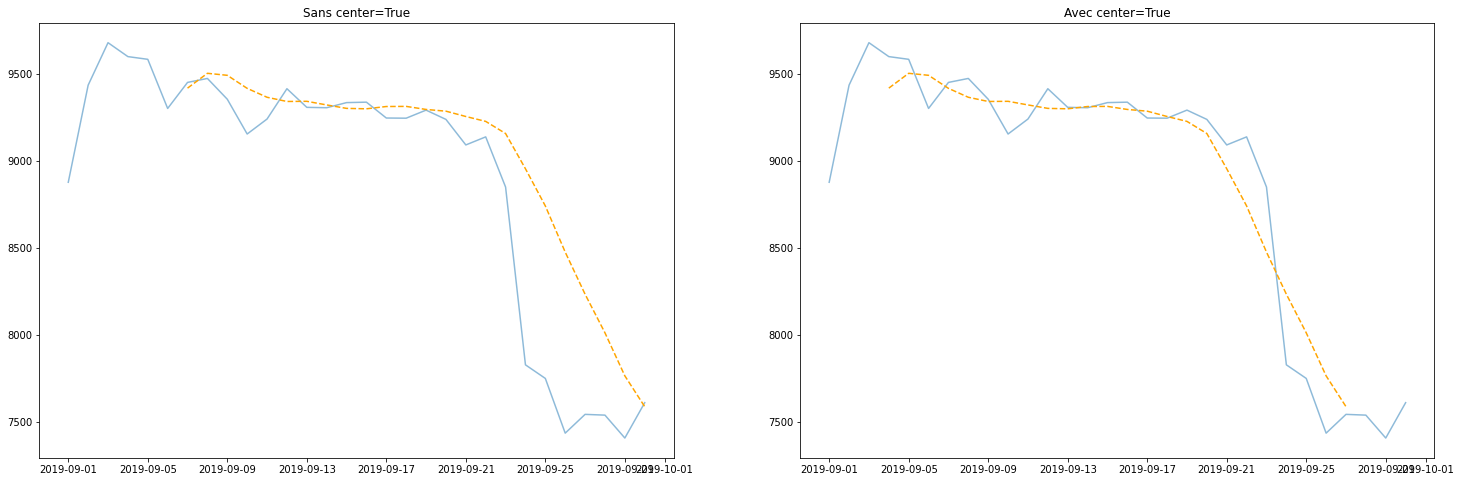

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(25,8), sharex=True)
ax[0].plot(bitcoin.loc['2019-09','Close'], alpha=0.5)
ax[0].plot(bitcoin.loc['2019-09','Close'].rolling(window=7).mean(), ls='--', c='orange')
ax[0].set_title('Sans center=True')

ax[1].plot(bitcoin.loc['2019-09','Close'], alpha=0.5)
ax[1].plot(bitcoin.loc['2019-09','Close'].rolling(window=7, center=True).mean(), ls='--', c='orange')
ax[1].set_title('Avec center=True')

La moyenne mobile exponentielle est directement implémentée dans Pandas sous le nom 'ewm'.

<AxesSubplot:xlabel='Date'>

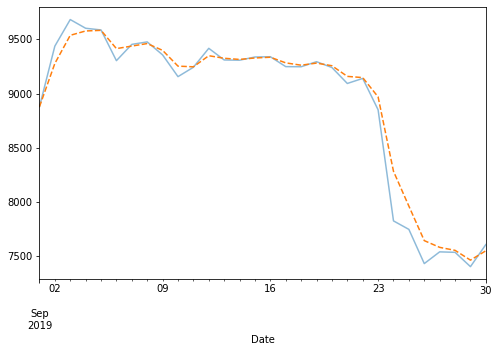

In [12]:
plt.figure(figsize=(8,5))
bitcoin.loc['2019-09','Close'].plot(alpha=0.5)
bitcoin.loc['2019-09','Close'].ewm(alpha=0.6).mean().plot(ls="--")

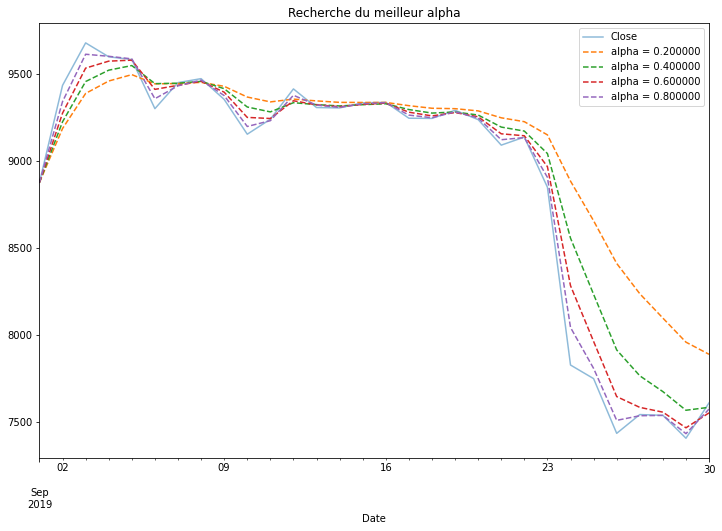

In [13]:
plt.figure(figsize=(12,8))
r = np.arange(0.2,1,0.2)
bitcoin.loc['2019-09','Close'].plot(alpha=0.5)

for i in r:
    bitcoin.loc['2019-09','Close'].ewm(alpha=i).mean().plot(ls="--", label='alpha = {:2f}'.format(i))

plt.title('Recherche du meilleur alpha')
plt.legend()

Grâce à ce graphe on peut voir la meilleure valeur de alpha pour 'fit' au mieux la courbe originelle.

# Associer des DataFrames ensemble

In [14]:
ether = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)

In [15]:
ether.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-11,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,286.677399,289.079956,279.644714,282.937531,282.937531,613364441


In [16]:
btc_eth = pd.merge(bitcoin, ether, on='Date', how='inner', suffixes=('_btc','_eth'))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

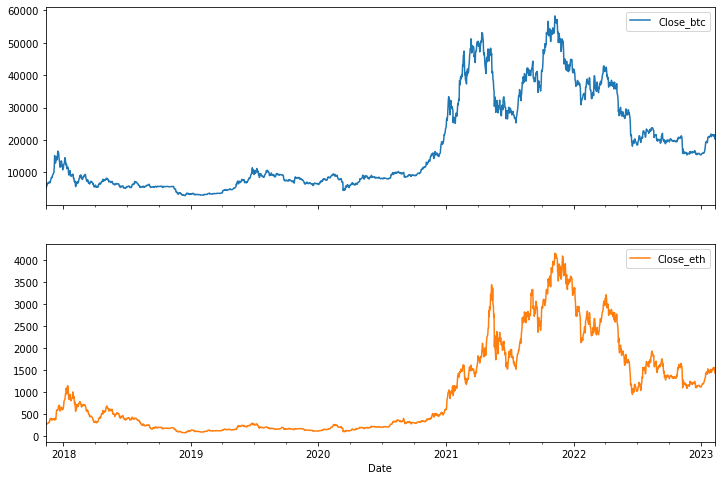

In [17]:
btc_eth[['Close_btc','Close_eth']].plot(subplots=True,figsize=(12,8))

# Exercice stratégie de la tortue

Cette stratégie consiste à savoir s'il faut acheter du bitcoin ou en vendre en fonction de la valeur minimale et maximale de Close sur les 28 derniers jours.
On utilise rolling pour calculer 'la moyenne de' la valeur max et min des 28 derniers jours.
Si Close > max, on achète.
Si Close < min, on vend.

<AxesSubplot:xlabel='Date'>

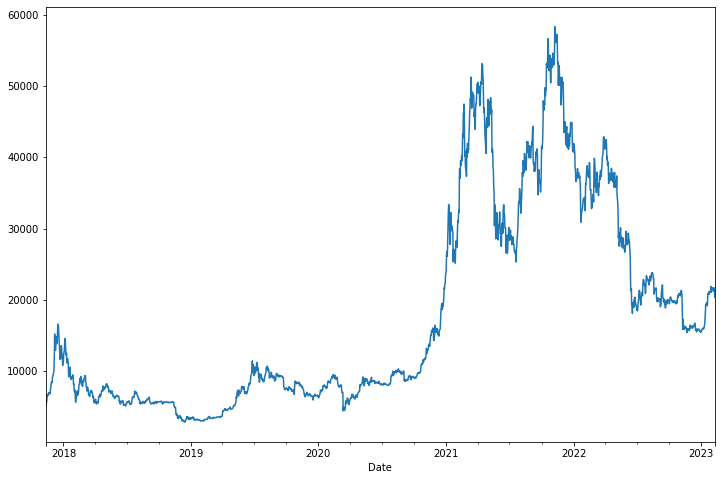

In [18]:
btc_eth['Close_btc'].plot(figsize=(12,8))

On ajoute deux colonnes, une 'buy' qui aura des 0 et des 1 pour symboliser quand acheter 
Une colonnes 'sell' avec des 0 et des -1 pour symboliser quand vendre.

In [19]:
exercice = btc_eth.copy()
exercice['buy'] = np.zeros(exercice.shape[0])
exercice['sell'] = np.zeros(exercice.shape[0])
exercice.head()

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth,buy,sell
Date,,,,,,,,,,,,,,
2017-11-11,5674.877930,5893.123535,5319.574707,5451.084473,5451.084473,4208762919,256.011322,273.902954,255.673492,269.811371,269.811371,722199256,0.0,0.0
2017-11-12,5397.796387,5680.399414,4732.066895,5102.976074,5102.976074,7682118257,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530,0.0,0.0
2017-11-13,5092.838867,5835.995117,5016.558105,5624.187988,5624.187988,5370187705,263.314758,281.949707,263.405121,271.556213,271.556213,893329318,0.0,0.0
2017-11-14,5625.894043,5796.897949,5494.685547,5628.764160,5628.764160,2711943351,271.596497,290.873871,271.573212,286.394958,286.394958,907354313,0.0,0.0
2017-11-15,5627.924316,6227.523438,5626.492188,6209.081543,6209.081543,3565506814,286.677399,289.079956,279.644714,282.937531,282.937531,613364441,0.0,0.0


Text(0.5, 1.0, 'Evolution du bitcoin en 2022 avec min et max sur les 28 derniers jours.')

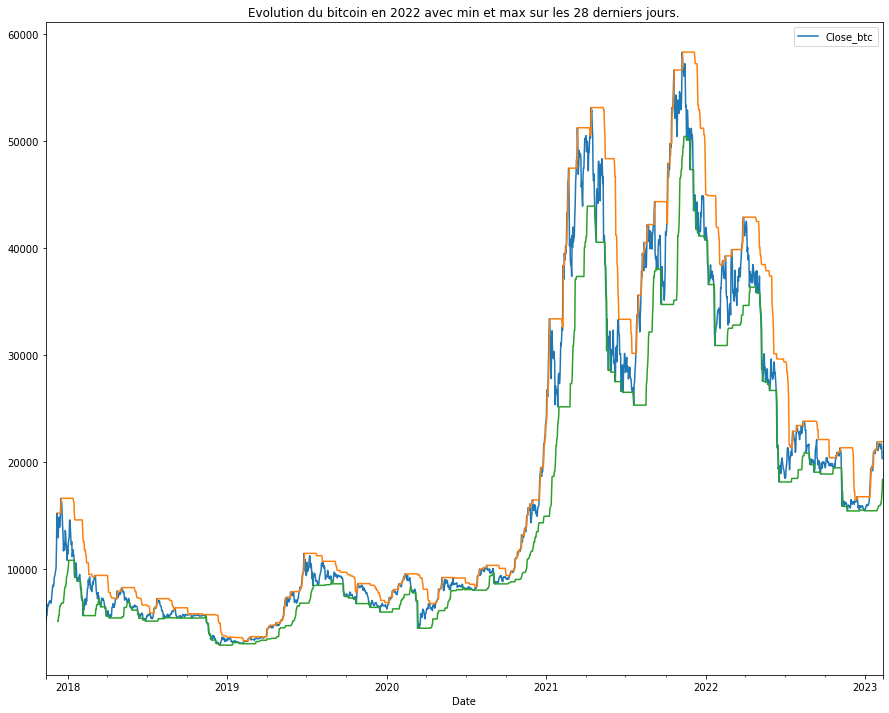

In [20]:
plt.figure(figsize=(15,12))
exercice['Close_btc'].plot()
max28 = exercice['Close_btc'].shift(1).rolling(window=28).max() # La méthode shift est nécessaire pour décaler nos fenêtre (nos predictions) d'un jour vers la droite. Sinon la courbe blueue est toujours entre le min et le max.
min28 = exercice['Close_btc'].shift(1).rolling(window=28).min()
plt.plot(max28)
plt.plot(min28)
plt.legend()
plt.title('Evolution du bitcoin en 2022 avec min et max sur les 28 derniers jours.')

In [21]:
exercice['max28'] = max28
exercice['min28'] = min28
exercice.head()

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth,buy,sell,max28,min28
Date,,,,,,,,,,,,,,,,
2017-11-11,5674.877930,5893.123535,5319.574707,5451.084473,5451.084473,4208762919,256.011322,273.902954,255.673492,269.811371,269.811371,722199256,0.0,0.0,NaN,NaN
2017-11-12,5397.796387,5680.399414,4732.066895,5102.976074,5102.976074,7682118257,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530,0.0,0.0,NaN,NaN
2017-11-13,5092.838867,5835.995117,5016.558105,5624.187988,5624.187988,5370187705,263.314758,281.949707,263.405121,271.556213,271.556213,893329318,0.0,0.0,NaN,NaN
2017-11-14,5625.894043,5796.897949,5494.685547,5628.764160,5628.764160,2711943351,271.596497,290.873871,271.573212,286.394958,286.394958,907354313,0.0,0.0,NaN,NaN
2017-11-15,5627.924316,6227.523438,5626.492188,6209.081543,6209.081543,3565506814,286.677399,289.079956,279.644714,282.937531,282.937531,613364441,0.0,0.0,NaN,NaN


In [22]:
exercice.dropna(axis=0,inplace=True)
exercice

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth,buy,sell,max28,min28
Date,,,,,,,,,,,,,,,,
2017-12-09,14045.648438,14266.406250,11624.363281,12902.244141,12902.244141,11825314601,388.765717,428.550659,387.838318,402.500854,402.500854,1703374689,0.0,0.0,15205.317383,5102.976074
2017-12-10,12893.914063,13473.818359,11243.284180,13134.529297,13134.529297,11416078837,401.894775,401.894775,365.108826,375.389648,375.389648,1193320275,0.0,0.0,15205.317383,5102.976074
2017-12-11,13110.733398,14866.225586,13090.414063,14383.695313,14383.695313,10321783467,374.231323,439.002197,373.133911,437.482788,437.482788,1504407643,0.0,0.0,15205.317383,5624.187988
2017-12-12,14369.257813,15160.542969,14075.936523,14832.978516,14832.978516,12438292779,443.554993,559.800720,428.517792,554.834351,554.834351,4411744962,0.0,0.0,15205.317383,5628.764160
2017-12-13,14905.033203,15031.589844,13626.455078,13862.959961,13862.959961,10963923704,549.276917,636.698120,508.937500,593.753845,593.753845,3822693396,0.0,0.0,15205.317383,6209.081543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,21274.843750,21532.833984,21155.503906,21213.240234,21213.240234,22205763797,1512.283936,1540.516968,1502.297241,1506.400513,1506.400513,6449569713,0.0,0.0,21867.869141,16022.666016
2023-02-07,21210.591797,21693.798828,21207.398438,21680.203125,21680.203125,25336708782,1506.179199,1560.213989,1504.950562,1558.155151,1558.155151,7483487813,0.0,0.0,21867.869141,16246.458984
2023-02-08,21679.386719,21783.050781,21200.021484,21407.873047,21407.873047,23677473761,1558.063599,1573.504761,1525.120117,1540.508301,1540.508301,7284923814,0.0,0.0,21867.869141,16659.367188


In [44]:
# for i in range(len(exercice['buy'])):
#     if exercice['Close_btc'][i] > exercice['max28'][i]:
#         exercice['buy'][i] = 1
#     elif exercice['Close_btc'][i] < exercice['min28'][i]:
#         exercice['sell'][i] = -1
#     else:
#         pass
# achat = exercice['buy']
# vente = exercice['sell']

for i in exercice.index:
    if exercice.loc[i,'Close_btc'] > exercice.loc[i,'max28']:  # Cette façon de faire est mieux (en utilisant .loc)
        exercice.loc[i,'buy'] = 1
    elif exercice.loc[i,'Close_btc'] < exercice.loc[i,'min28']:
        exercice.loc[i,'sell'] = -1
    else:
        pass
achat = exercice['buy']
vente = exercice['sell']

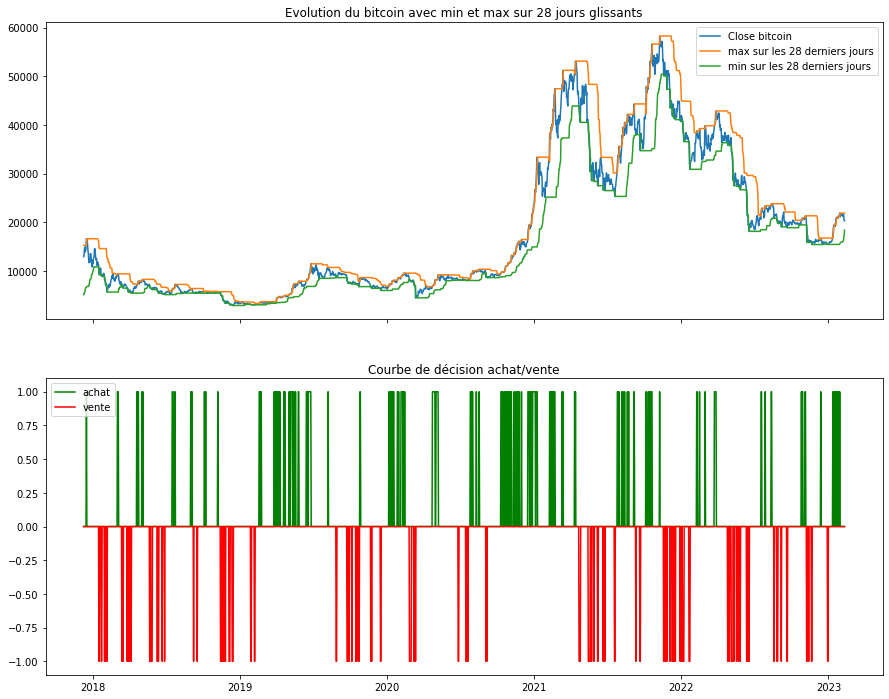

In [48]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(15,12))
ax[0].plot(exercice['Close_btc'], label='Close bitcoin')
ax[0].plot(max28,label='max sur les 28 derniers jours')
ax[0].plot(min28,label='min sur les 28 derniers jours')
ax[0].set_title('Evolution du bitcoin avec min et max sur 28 jours glissants')
ax[0].legend()

ax[1].plot(achat, c='g', label="achat")
ax[1].plot(vente, c='r', label="vente")
ax[1].set_title('Courbe de décision achat/vente')
ax[1].legend()

In [49]:
exercice.head()

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth,buy,sell,max28,min28
Date,,,,,,,,,,,,,,,,
2017-12-09,14045.648438,14266.406250,11624.363281,12902.244141,12902.244141,11825314601,388.765717,428.550659,387.838318,402.500854,402.500854,1703374689,0.0,0.0,15205.317383,5102.976074
2017-12-10,12893.914063,13473.818359,11243.284180,13134.529297,13134.529297,11416078837,401.894775,401.894775,365.108826,375.389648,375.389648,1193320275,0.0,0.0,15205.317383,5102.976074
2017-12-11,13110.733398,14866.225586,13090.414063,14383.695313,14383.695313,10321783467,374.231323,439.002197,373.133911,437.482788,437.482788,1504407643,0.0,0.0,15205.317383,5624.187988
2017-12-12,14369.257813,15160.542969,14075.936523,14832.978516,14832.978516,12438292779,443.554993,559.800720,428.517792,554.834351,554.834351,4411744962,0.0,0.0,15205.317383,5628.764160
2017-12-13,14905.033203,15031.589844,13626.455078,13862.959961,13862.959961,10963923704,549.276917,636.698120,508.937500,593.753845,593.753845,3822693396,0.0,0.0,15205.317383,6209.081543


In [47]:
exercice.loc['2018-12-02','Close_btc']

3650.523682